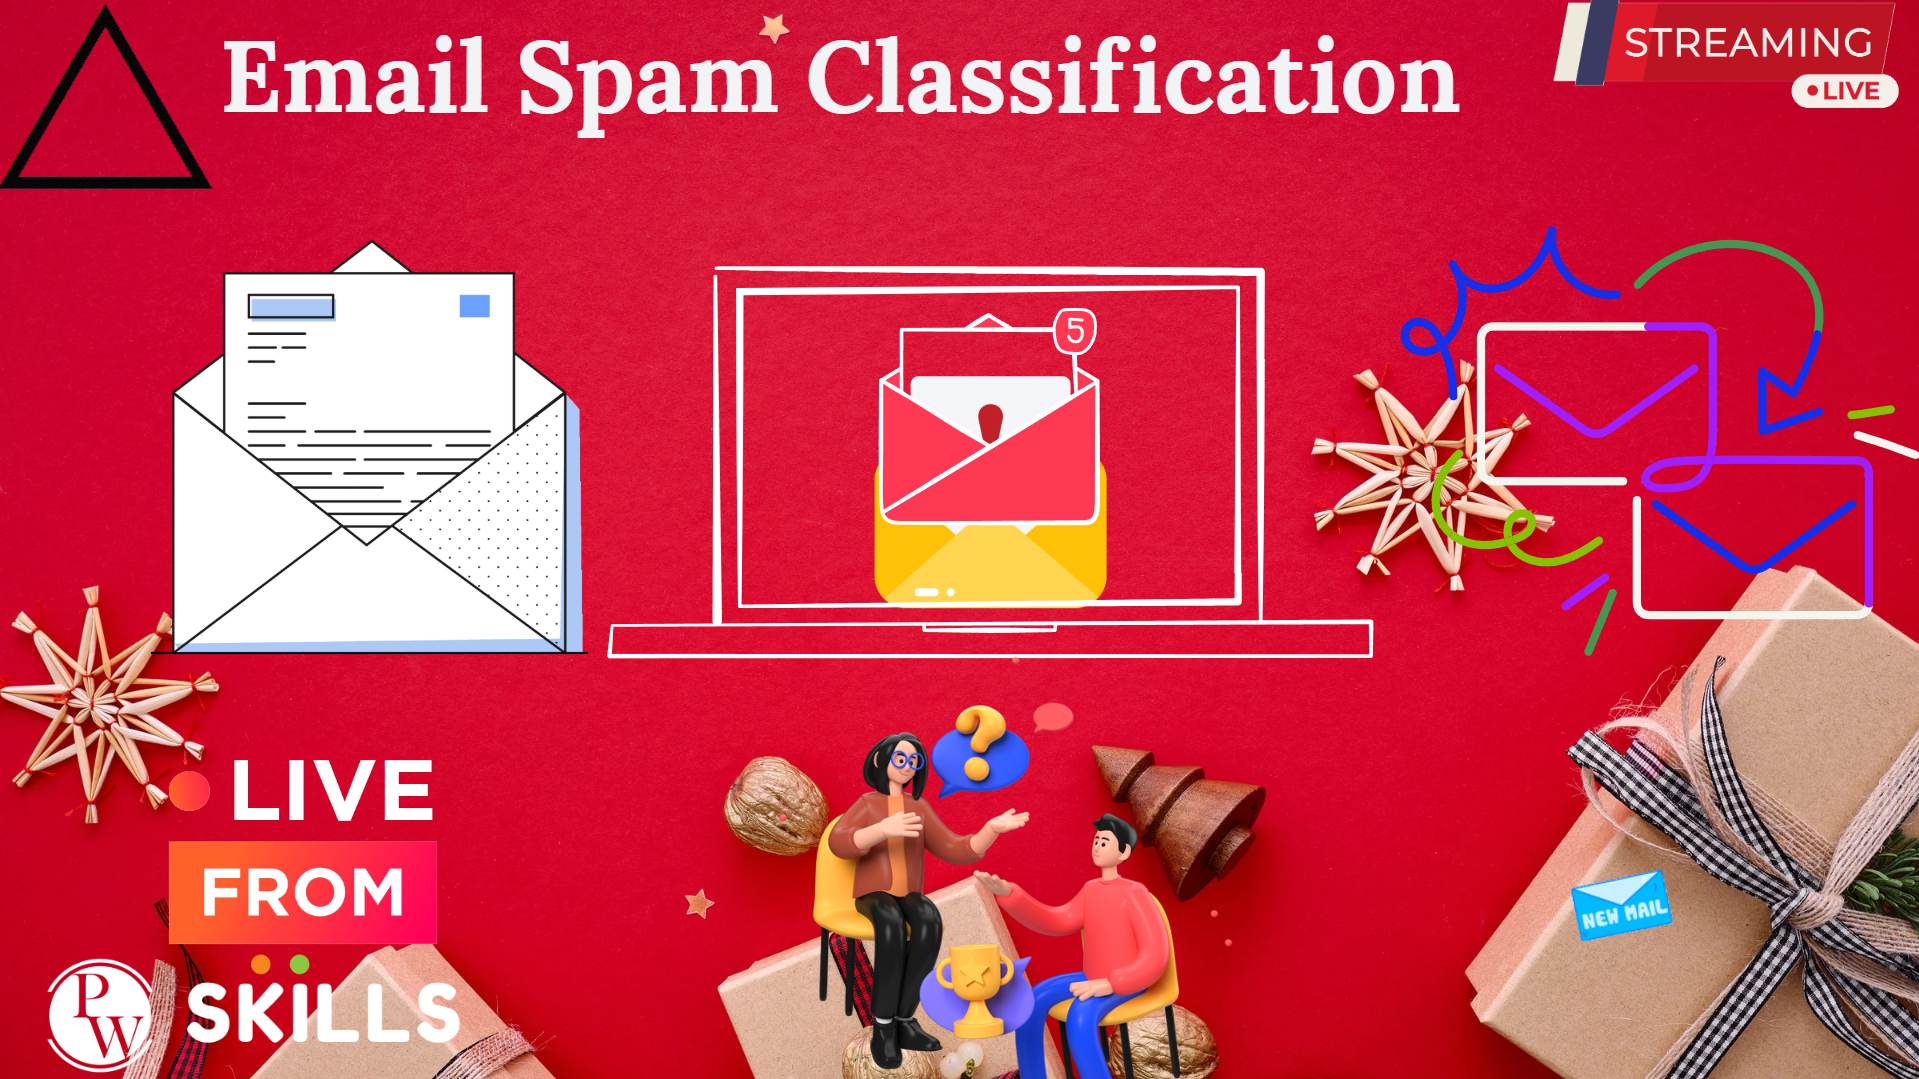

In [ ]:
# Import the kagglehub library to access Kaggle datasets
import kagglehub
beatoa_spamassassin_public_corpus_path = kagglehub.dataset_download('beatoa/spamassassin-public-corpus')

print('Data source import complete.')

100%|██████████| 11.1M/11.1M [00:00<00:00, 80.7MB/s]

Extracting files...


Data source import complete.


image.png

In [ ]:
# Install all necessary libraries

!pip install kagglehub
!pip install nltk scikit-learn

In [ ]:

# Import necessary libraries
import os  # for operating system-related tasks
import kagglehub  # for accessing Kaggle datasets
import pandas as pd  # for data manipulation and analysis
import re  # for regular expression tasks
import nltk  # for natural language processing tasks
from nltk.tokenize import word_tokenize  # for text tokenization
from nltk.corpus import stopwords  # for removing stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer  # for text normalization
from sklearn.feature_extraction.text import CountVectorizer  # for feature extraction
from sklearn.model_selection import train_test_split  # for splitting data into training and testing sets
from sklearn.naive_bayes import MultinomialNB  # for Naive Bayes classification
from sklearn.metrics import accuracy_score, classification_report  # for evaluating model performance


In [ ]:
# Download latest version
path = kagglehub.dataset_download("beatoa/spamassassin-public-corpus")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/beatoa/spamassassin-public-corpus/versions/2


In [ ]:
import os

# Explore dataset directory
for root, dirs, files in os.walk(path):
    print(f"Directory: {root}")
    print(f"Contains {len(files)} files.\n")

Directory: /root/.cache/kagglehub/datasets/beatoa/spamassassin-public-corpus/versions/2
Contains 0 files.

Directory: /root/.cache/kagglehub/datasets/beatoa/spamassassin-public-corpus/versions/2/easy_ham
Contains 0 files.

Directory: /root/.cache/kagglehub/datasets/beatoa/spamassassin-public-corpus/versions/2/easy_ham/easy_ham
Contains 2551 files.

Directory: /root/.cache/kagglehub/datasets/beatoa/spamassassin-public-corpus/versions/2/easy_ham/__MACOSX
Contains 1 files.

Directory: /root/.cache/kagglehub/datasets/beatoa/spamassassin-public-corpus/versions/2/easy_ham/__MACOSX/easy_ham
Contains 2551 files.

Directory: /root/.cache/kagglehub/datasets/beatoa/spamassassin-public-corpus/versions/2/hard_ham
Contains 0 files.

Directory: /root/.cache/kagglehub/datasets/beatoa/spamassassin-public-corpus/versions/2/hard_ham/hard_ham
Contains 250 files.

Directory: /root/.cache/kagglehub/datasets/beatoa/spamassassin-public-corpus/versions/2/hard_ham/__MACOSX
Contains 1 files.

Directory: /root/.c

In [ ]:
# Define directories
spam_dir = '/root/.cache/kagglehub/datasets/beatoa/spamassassin-public-corpus/versions/2/spam_2/spam_2/'
easy_ham_dir = '/root/.cache/kagglehub/datasets/beatoa/spamassassin-public-corpus/versions/2/easy_ham/easy_ham/'
hard_ham_dir = '/root/.cache/kagglehub/datasets/beatoa/spamassassin-public-corpus/versions/2/hard_ham/hard_ham/'

# Function to read files from a given directory and assign a label
def load_data_from_dir(directory, label):
    texts = []
    labels = []
    for filename in os.listdir(directory):
        with open(os.path.join(directory, filename), 'r', encoding='latin1') as file:
            texts.append(file.read())  # Read the content of the email file
            labels.append(label)  # Assign the provided label (1 for spam, 0 for ham)
    return texts, labels

# Load data from each directory
spam_texts, spam_labels = load_data_from_dir(spam_dir, 1)  # 1 for spam
easy_ham_texts, easy_ham_labels = load_data_from_dir(easy_ham_dir, 0)  # 0 for ham
hard_ham_texts, hard_ham_labels = load_data_from_dir(hard_ham_dir, 0)  # 0 for ham

# Combine all data and labels into one dataset
texts = spam_texts + easy_ham_texts + hard_ham_texts
labels = spam_labels + easy_ham_labels + hard_ham_labels

# Create a DataFrame
raw_df = pd.DataFrame({'text': texts, 'label': labels})

# Check the DataFrame
raw_df.head()

text  label
0  From miaj@close2you.net  Mon Jun 24 17:03:12 2...      1
1  From ruler888@yahoo.com  Mon Jun 24 17:03:13 2...      1
2  From playnb4ubbikair@sprintmail.com  Wed Jul  ...      1
3  From fork-admin@xent.com  Wed Jul  3 12:35:01 ...      1
4  From jm@netnoteinc.com  Mon Jul 29 11:22:06 20...      1

In [ ]:
# Check the Dataframe structure
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4198 entries, 0 to 4197
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    4198 non-null   object
 1   label   4198 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 65.7+ KB


In [ ]:
# Reorder the columns
raw_df = raw_df[['text', 'label']]

# Display the updated DataFrame
raw_df.head()

text  label
0  From miaj@close2you.net  Mon Jun 24 17:03:12 2...      1
1  From ruler888@yahoo.com  Mon Jun 24 17:03:13 2...      1
2  From playnb4ubbikair@sprintmail.com  Wed Jul  ...      1
3  From fork-admin@xent.com  Wed Jul  3 12:35:01 ...      1
4  From jm@netnoteinc.com  Mon Jul 29 11:22:06 20...      1

In [ ]:
raw_df["label"].value_counts()

label
0    2801
1    1397
Name: count, dtype: int64

In [ ]:
raw_df.to_csv("spam-ham.csv")

In [ ]:
raw_df["text"][5]

'From Union@dogma.slashnull.org  Mon Jun 24 17:42:26 2002\nReturn-Path: MkyD@tpts5.seed.net.tw\nDelivery-Date: Sat Mar 16 09:36:33 2002\nReceived: from user (awork080146.netvigator.com [203.198.84.146]) by\n    dogma.slashnull.org (8.11.6/8.11.6) with SMTP id g2G9aVg30945 for\n    <webmaster@efi.ie>; Sat, 16 Mar 2002 09:36:32 GMT\nDate: Sat, 16 Mar 2002 09:36:32 GMT\nReceived: from tpts4 by tcts1.seed.net.tw with SMTP id\n    dpeyX0jGVPKU37zroYC2; Sat, 16 Mar 2002 17:33:55 +0800\nMessage-Id: <QEQBgLxHFe@mail.sysnet.net.tw>\nFrom: Union@dogma.slashnull.org\nTo: unionc@unioncameraltd.com\nSubject: Brand Name Product Business\nX-Mailer: 1DBTOPMHYPvWHpRaW08Y3j\nContent-Type: text/plain;\nX-Priority: 3\nX-Msmail-Priority: Normal\nContent-Transfer-Encoding: 8bit\nX-MIME-Autoconverted: from Quoted-Printable to 8bit by dogma.slashnull.org\n    id g2G9aVg30945\nX-Status: \nX-Keywords: \n\nDear Sir/Madam,\n \nBRAND NAME PRODUCTS\n \nAny brand name products you would like to buy or sell in volume

This appears to be the raw email source of a spam email promoting monitor deals from "Bluecom Danmark AS." Let's break down the key components:

1. **Sender & Recipient Details:**
   - The email is from `forkadmin@xent.com`, which seems to be an admin email of a mailing list.
   - It was delivered to `fork@spamassassin.taint.org`, which suggests it was processed by SpamAssassin, a spam-filtering software.

2. **Email Routing (Received Headers):**
   - The email was routed through multiple mail servers (`phobos.labs.netnoteinc.com`, `xent.com`, `dogma.slashnull.org`, `mail2.l.com`).
   - It was originally sent from `news@bluecom.com.com` and traveled across various servers before being delivered.

3. **Message Content:**
   - **Subject:** "Super cool monitor deals" (indicative of a promotional or spam email).
   - **MIME Format:** It contains both plain text and HTML versions of the email.
   - **Links & Advertisements:** It promotes monitors with links to `http://www.bluecom.com/promomonitors_exp`.
   - **Unsubscribe Option:** There’s an attempt at an unsubscribe mechanism via `http://ocms.ocms.dk/engine/redirector.dcf?mid=1264`.

4. **Spam Indicators:**
   - The email has a "bulk" precedence flag, meaning it was likely part of a mass mailing.
   - The sender domain `bluecom.com.com` seems suspicious (possibly a spoofed domain).
   - It was sent to a known spam filter (`spamassassin.taint.org`), likely for testing or filtering.

### Meaning of "ite" in the context of your question:
If you're referring to a specific part of the text, "ite" doesn't appear explicitly in the email. However:
   - It might be a typo or corrupted text from the email source.
   - If you're asking about "ITE" in general, it could stand for "Information Technology Equipment" (common in IT contexts).


# **Feature Engineering for Email Classification**  

#### **1. Header-Based Features**  
- `num_received_headers`: Number of times the email was received (counting "Received" headers).  
- `num_return_paths`: Count of "Return-Path" headers.  
- `num_hops`: Number of mail servers the email passed through (counting "Received" headers).  
- `has_reply_to`: Binary (1 if "Reply-To" exists, 0 otherwise).  
- `num_message_ids`: Count of unique "Message-Id" headers.  
- `from_domain`: Extract domain from "From" (e.g., `aol.com`).  
- `to_domain`: Extract domain from "To" (e.g., `sourceforge.net`).  
- `sender_ip`: Extract sender's IP from "Received" headers.  
- `email_client`: Extract the email client from "X-Mailer" (e.g., `Microsoft Outlook Express`).  

#### **2. Content-Based Features**  
- `body_length`: Number of characters in the email body.  
- `num_links`: Count of URLs in the email body.  
- `num_images`: Count of `<img>` tags in the body (for HTML emails).  
- `num_base64_encoded`: Count of base64-encoded sections (potential phishing).  
- `html_flag`: Binary (1 if email is HTML, 0 if plain text).  
- `num_special_chars`: Count of special characters (e.g., `@`, `$`, `#`).  
- `num_words`: Total number of words in the email body.  
- `avg_word_length`: Average length of words in the email body.  
- `num_stopwords`: Count of common stopwords (e.g., "the", "is", "and").  
- `num_uppercase_words`: Count of words in uppercase.  
- `num_digits`: Count of numeric characters.  

#### **3. Email List Features**  
- `is_mailing_list`: Binary (1 if email is from a mailing list, 0 otherwise).  
- `num_list_headers`: Count of list-related headers (e.g., "List-Subscribe", "List-Unsubscribe").  

#### **4. Temporal Features**  
- `day_of_week`: Day of the week the email was sent.  
- `hour_of_day`: Hour the email was sent.  
- `time_to_reply`: Time difference between `Received` timestamps.  

#### **5. Anomaly Detection Features**  
- `is_suspicious_sender`: Binary (1 if sender's domain/IP is rare or flagged).  
- `num_recipients`: Number of recipients in the "To" field.  
- `num_cc_recipients`: Number of recipients in the "CC" field.  
- `mismatch_from_return_path`: Binary (1 if "From" and "Return-Path" domains don't match).  
- `num_forwarded_headers`: Count of "Fwd" or "Forwarded" headers in the email.  


In [ ]:
import pandas as pd
import re
import string
from urllib.parse import urlparse
from email.parser import Parser
from collections import Counter
import nltk
from nltk.corpus import stopwords
from datetime import datetime

# Download stopwords
nltk.download("stopwords")
stop_words = set(stopwords.words("english"))

def clean_domain(email_address):
    """Extracts domain and removes any unwanted characters."""
    if email_address:
        match = re.search(r'@([\w.-]+)', email_address)
        if match:
            return match.group(1)  # Extract only the domain part
    return ""

def extract_temporal_features(email_text):
    """
    Extracts day_of_week and hour_of_day from the email text.
    Tries "Received" headers first, falls back to "Date" header if needed.
    """
    try:
        # Split the text into lines and find the "Received" headers
        lines = email_text.split("\n")
        for line in lines:
            if line.strip().startswith("Received:"):
                # Extract the timestamp part
                timestamp_part = line.split(";")[-1].strip()
                # Try parsing with different formats
                try:
                    # Format 1: "%a, %d %b %Y %H:%M:%S %z"
                    timestamp = datetime.strptime(timestamp_part, "%a, %d %b %Y %H:%M:%S %z")
                except ValueError:
                    try:
                        # Format 2: "%a, %d %b %Y %H:%M:%S %Z"
                        timestamp = datetime.strptime(timestamp_part, "%a, %d %b %Y %H:%M:%S %Z")
                    except ValueError:
                        try:
                            # Format 3: "%a, %d %b %Y %H:%M:%S"
                            timestamp = datetime.strptime(timestamp_part, "%a, %d %b %Y %H:%M:%S")
                        except ValueError:
                            # If all formats fail, skip this line
                            continue
                # Extract day_of_week (Monday=0, Sunday=6) and hour_of_day
                day_of_week = timestamp.weekday()
                hour_of_day = timestamp.hour
                return day_of_week, hour_of_day

        # If no valid timestamp is found in "Received" headers, try the "Date" header
        email = Parser().parsestr(email_text)
        date_header = email["Date"]
        if date_header:
            try:
                # Try parsing the "Date" header
                timestamp = datetime.strptime(date_header, "%a, %d %b %Y %H:%M:%S %z")
            except ValueError:
                try:
                    timestamp = datetime.strptime(date_header, "%a, %d %b %Y %H:%M:%S %Z")
                except ValueError:
                    try:
                        timestamp = datetime.strptime(date_header, "%a, %d %b %Y %H:%M:%S")
                    except ValueError:
                        # If all formats fail, return default values
                        return -1, -1
            # Extract day_of_week and hour_of_day
            day_of_week = timestamp.weekday()
            hour_of_day = timestamp.hour
            return day_of_week, hour_of_day

    except Exception as e:
        # Handle cases where parsing fails
        print(f"Error parsing timestamp: {e}")

    # If no valid timestamp is found, return default values
    return -1, -1

def extract_features(email_text):
    """
    Extracts various features from raw email text.
    """
    # Parse email headers and body
    email = Parser().parsestr(email_text)

    # Extract header information
    headers = email.items()
    num_received_headers = sum(1 for h in headers if "Received" in h[0])
    num_return_paths = sum(1 for h in headers if "Return-Path" in h[0])
    has_reply_to = 1 if email["Reply-To"] else 0
    num_message_ids = sum(1 for h in headers if "Message-ID" in h[0])

    from_domain = clean_domain(email["From"])
    to_domain = clean_domain(email["To"])
    email_client = email["X-Mailer"] if email["X-Mailer"] else ""

    # Extract email body
    body = email.get_payload()
    if isinstance(body, list):  # Handle multipart emails
        body = " ".join(part.get_payload() for part in body if part.get_content_type() == "text/plain")

    # Content-based features
    body_length = len(body)
    num_links = len(re.findall(r"https?://\S+", body))
    num_images = len(re.findall(r"<img\s", body, re.IGNORECASE))
    num_base64_encoded = len(re.findall(r"base64", body, re.IGNORECASE))
    html_flag = 1 if "<html" in body.lower() else 0
    num_special_chars = sum(1 for char in body if char in string.punctuation)
    words = body.split()
    num_words = len(words)
    avg_word_length = sum(len(word) for word in words) / num_words if num_words > 0 else 0
    num_stopwords = sum(1 for word in words if word.lower() in stop_words)
    num_uppercase_words = sum(1 for word in words if word.isupper())
    num_digits = sum(1 for char in body if char.isdigit())

    # Extract temporal features
    day_of_week, hour_of_day = extract_temporal_features(email_text)

    # Anomaly detection features
    num_recipients = len(email["To"].split(",")) if email["To"] else 0
    num_cc_recipients = len(email["Cc"].split(",")) if email["Cc"] else 0
    mismatch_from_return_path = 1 if email["From"] and email["Return-Path"] and email["From"].split("@")[-1] != email["Return-Path"].split("@")[-1] else 0

    return [
        num_received_headers, num_return_paths, has_reply_to, num_message_ids,
        from_domain, to_domain, email_client, body_length, num_links, num_images,
        num_base64_encoded, html_flag, num_special_chars, num_words, avg_word_length,
        num_stopwords, num_uppercase_words, num_digits, day_of_week, hour_of_day,
        num_recipients, num_cc_recipients, mismatch_from_return_path
    ]

# Load the raw dataset
raw_df = pd.read_csv("spam-ham.csv")

# Apply feature extraction
feature_columns = [
    "num_received_headers", "num_return_paths", "has_reply_to", "num_message_ids",
    "from_domain", "to_domain", "email_client", "body_length", "num_links", "num_images",
    "num_base64_encoded", "html_flag", "num_special_chars", "num_words", "avg_word_length",
    "num_stopwords", "num_uppercase_words", "num_digits", "day_of_week", "hour_of_day",
    "num_recipients", "num_cc_recipients", "mismatch_from_return_path"
]

# Extract features and create a DataFrame
df = pd.DataFrame(raw_df["text"].apply(extract_features).tolist(), columns=feature_columns)

# Add the label column
df["label"] = raw_df["label"]

# Save processed data
df.to_csv("processed_dataset.csv", index=False)

print("Processed dataset saved to 'processed_dataset.csv'")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Processed dataset saved to 'processed_dataset.csv'


In [ ]:
df

num_received_headers  num_return_paths  has_reply_to  num_message_ids  \
0                        3                 1             1                0   
1                        3                 1             0                0   
2                        3                 1             1                0   
3                        7                 1             0                0   
4                        4                 1             1                0   
...                    ...               ...           ...              ...   
4193                     2                 1             0                1   
4194                     2                 1             0                1   
4195                    11                 2             0                1   
4196                     8                 1             1                0   
4197                     2                 2             0                1   

                from_domain                    to_domain  \
0             close2you.net                pager.icq.com   
1                 yahoo.com  mandark.labs.netnoteinc.com   
2            sprintmail.com          dogma.slashnull.org   
3                 yahoo.com                  voycomp.com   
4            netnoteinc.com               netnoteinc.com   
...                     ...                          ...   
4193  newsletter.online.com                  example.com   
4194  newsletter.online.com                  example.com   
4195      harpercollins.com                  fastmail.fm   
4196         lifetimetv.com               lifetimetv.com   
4197         geocaching.com                   lerctr.org   

                            email_client  body_length  num_links  num_images  \
0                                                2123          1           0   
1                                                4689          7           2   
2                                                1434          0           0   
3                                                4775          3           0   
4                                                 790          2           0   
...                                  ...          ...        ...         ...   
4193  Accucast (http://www.accucast.com)        21167        112          65   
4194  Accucast (http://www.accucast.com)        29564        145         108   
4195                                             2379         22           0   
4196                                             7051         20           0   
4197     Microsoft CDO for Exchange 2000         2212         12           0   

      ...  avg_word_length  num_stopwords  num_uppercase_words  num_digits  \
0     ...         8.524887             31                   99         178   
1     ...        12.047945             46                   19         781   
2     ...         4.126866            118                   61           9   
3     ...        12.229050             31                    3         182   
4     ...         4.827068             56                    2           9   
...   ...              ...            ...                  ...         ...   
4193  ...        11.532567            139                   36        1073   
4194  ...        12.515043            124                   51        2070   
4195  ...        16.732824             43                    5         225   
4196  ...         6.026026            370                   84         109   
4197  ...         8.371795             44                   27         232   

      day_of_week  hour_of_day  num_recipients  num_cc_recipients  \
0               6            1              48                  0   
1               6            3               1                  0   
2               2            5               1                  0   
3               1            8               1                  4   
4               6            4               1                  0   
...           ...       

In [ ]:
df['day_of_week'].unique(), df['hour_of_day'].unique()

(array([ 6,  2,  1,  5,  0, -1,  4,  3]),
 array([ 1,  3,  5,  8,  4,  9, 21, 23, 19, 22, -1, 14, 10, 12, 20,  2, 18,
         7,  6,  0, 13, 15, 17, 11, 16]))


Explanation of the Output:
array([1, 2, 6, 4, -1, 0, 3, 5]):

This array represents the day_of_week values.

-1 indicates that no valid timestamp was found for those emails.

The other values (1, 2, 6, etc.) correspond to the day of the week:

0 = Monday

1 = Tuesday

2 = Wednesday

3 = Thursday

4 = Friday

5 = Saturday

6 = Sunday

array([14, 22, 19, 11, 5, -1, 20, 0, 8, 16, 15, 4, 10, 6, 23, 3, 18, 13, 1, 9, 21, 2, 12, 7, 17]):

This array represents the hour_of_day values.

-1 indicates that no valid timestamp was found for those emails.

The other values (14, 22, 19, etc.) correspond to the hour of the day (in 24-hour format).

Why -1 is Still Returned:
The function returns -1 for day_of_week and hour_of_day when:

No valid timestamp is found in either the "Received" headers or the Date header.

The timestamp format in the email does not match any of the expected formats.

The email is missing both "Received" and Date headers.

In [ ]:
df=pd.read_csv("processed_dataset.csv")

In [ ]:
df

num_received_headers  num_return_paths  has_reply_to  num_message_ids  \
0                        3                 1             1                0   
1                        3                 1             0                0   
2                        3                 1             1                0   
3                        7                 1             0                0   
4                        4                 1             1                0   
...                    ...               ...           ...              ...   
4193                     2                 1             0                1   
4194                     2                 1             0                1   
4195                    11                 2             0                1   
4196                     8                 1             1                0   
4197                     2                 2             0                1   

                from_domain                    to_domain  \
0             close2you.net                pager.icq.com   
1                 yahoo.com  mandark.labs.netnoteinc.com   
2            sprintmail.com          dogma.slashnull.org   
3                 yahoo.com                  voycomp.com   
4            netnoteinc.com               netnoteinc.com   
...                     ...                          ...   
4193  newsletter.online.com                  example.com   
4194  newsletter.online.com                  example.com   
4195      harpercollins.com                  fastmail.fm   
4196         lifetimetv.com               lifetimetv.com   
4197         geocaching.com                   lerctr.org   

                            email_client  body_length  num_links  num_images  \
0                                    NaN         2123          1           0   
1                                    NaN         4689          7           2   
2                                    NaN         1434          0           0   
3                                    NaN         4775          3           0   
4                                    NaN          790          2           0   
...                                  ...          ...        ...         ...   
4193  Accucast (http://www.accucast.com)        21167        112          65   
4194  Accucast (http://www.accucast.com)        29564        145         108   
4195                                 NaN         2379         22           0   
4196                                 NaN         7051         20           0   
4197     Microsoft CDO for Exchange 2000         2212         12           0   

      ...  avg_word_length  num_stopwords  num_uppercase_words  num_digits  \
0     ...         8.524887             31                   99         178   
1     ...        12.047945             46                   19         781   
2     ...         4.126866            118                   61           9   
3     ...        12.229050             31                    3         182   
4     ...         4.827068             56                    2           9   
...   ...              ...            ...                  ...         ...   
4193  ...        11.532567            139                   36        1073   
4194  ...        12.515043            124                   51        2070   
4195  ...        16.732824             43                    5         225   
4196  ...         6.026026            370                   84         109   
4197  ...         8.371795             44                   27         232   

      day_of_week  hour_of_day  num_recipients  num_cc_recipients  \
0               6            1              48                  0   
1               6            3               1                  0   
2               2            5               1                  0   
3               1            8               1                  4   
4               6            4               1                  0   
...           ...       

In [ ]:
len(df['from_domain'].unique())

973

# Key Features Extracted

| Feature Name                   | Description                                         |
|--------------------------------|-----------------------------------------------------|
| **num_received_headers**       | Number of "Received" headers.                      |
| **num_return_paths**           | Number of "Return-Path" headers.                   |
| **has_reply_to**               | 1 if "Reply-To" exists, else 0.                    |
| **num_message_ids**            | Count of "Message-ID" headers.                     |
| **from_domain**                | Extracted sender's domain.                         |
| **to_domain**                  | Extracted recipient's domain.                      |
| **email_client**               | Extracted email client info.                       |
| **body_length**                | Total length of email body.                        |
| **num_links**                  | Count of URLs in email.                            |
| **num_images**                 | Count of image tags.                               |
| **num_base64_encoded**         | Count of base64-encoded sections.                  |
| **html_flag**                  | 1 if email is in HTML format, else 0.              |
| **num_special_chars**          | Count of special characters.                       |
| **num_words**                  | Total number of words.                             |
| **avg_word_length**            | Average length of words.                           |
| **num_stopwords**              | Count of stopwords.                                |
| **num_uppercase_words**        | Count of words in uppercase.                       |
| **num_digits**                 | Count of numeric characters.                       |
| **day_of_week**                | Day of the week email was sent.                    |
| **hour_of_day**                | Hour email was sent.                               |
| **num_recipients**             | Number of recipients in "To".                      |
| **num_cc_recipients**          | Number of recipients in "CC".                      |
| **mismatch_from_return_path**  | 1 if sender domain ≠ Return-Path domain.           |


In [ ]:
# Duplicate value check
df.duplicated().sum()

np.int64(188)

In [ ]:
# Duplicate value check is it droped or not
df.duplicated().sum()

np.int64(188)

In [ ]:
len(df['to_domain'].unique())

530

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Data Overview
print("Dataset Shape:", df.shape)

Dataset Shape: (4198, 24)


In [ ]:
# Missing Values
print("\nMissing Values:\n", df.isnull().sum())


Missing Values:
 num_received_headers            0
num_return_paths                0
has_reply_to                    0
num_message_ids                 0
from_domain                     4
to_domain                     227
email_client                 2632
body_length                     0
num_links                       0
num_images                      0
num_base64_encoded              0
html_flag                       0
num_special_chars               0
num_words                       0
avg_word_length                 0
num_stopwords                   0
num_uppercase_words             0
num_digits                      0
day_of_week                     0
hour_of_day                     0
num_recipients                  0
num_cc_recipients               0
mismatch_from_return_path       0
label                           0
dtype: int64


The analysis of the processed dataset reveals that there are minimal missing values present. Out of the 25 features extracted, only three features have missing values:

- from_domain has 4 missing values
- to_domain has 227 missing values
- email_client has 2632 missing values

The presence of missing values in these features may indicate that some emails did not contain this information or that it was not properly extracted during the feature extraction process.

However, it's worth noting that the majority of features have no missing values, indicating that the dataset is relatively complete and clean. The label feature, which represents the spam/ham classification, also has no missing values, which is crucial for training a reliable machine learning model.



In [ ]:
print("\nDescriptive Statistics:\n")
df.describe()


Descriptive Statistics:



num_received_headers  num_return_paths  has_reply_to  num_message_ids  \
count           4198.000000       4198.000000   4198.000000      4198.000000   
mean               5.013101          0.965698      0.331586         0.103859   
std                2.602041          0.257857      0.470839         0.306672   
min                0.000000          0.000000      0.000000         0.000000   
25%                3.000000          1.000000      0.000000         0.000000   
50%                5.000000          1.000000      0.000000         0.000000   
75%                7.000000          1.000000      1.000000         0.000000   
max               15.000000          2.000000      1.000000         2.000000   

         body_length    num_links   num_images  num_base64_encoded  \
count    4198.000000  4198.000000  4198.000000         4198.000000   
mean     3098.866127     7.201525     2.238447            0.002144   
std      7047.701870    53.487115    13.915795            0.055613   
min         0.000000     0.000000     0.000000            0.000000   
25%       578.250000     1.000000     0.000000            0.000000   
50%      1120.500000     2.000000     0.000000            0.000000   
75%      2391.500000     3.000000     0.000000            0.000000   
max    194824.000000  3131.000000   142.000000            2.000000   

         html_flag  num_special_chars  ...  avg_word_length  num_stopwords  \
count  4198.000000        4198.000000  ...      4198.000000    4198.000000   
mean      0.173892         442.744402  ...         7.396016     102.637923   
std       0.379062        1133.316619  ...         6.615459     237.931658   
min       0.000000           0.000000  ...         0.000000       0.000000   
25%       0.000000          46.000000  ...         5.087186      23.000000   
50%       0.000000         112.000000  ...         6.052912      47.000000   
75%       0.000000         281.750000  ...         8.093962      95.000000   
max       1.000000       23209.000000  ...       281.500000    5492.000000   

       num_uppercase_words    num_digits  day_of_week  hour_of_day  \
count          4198.000000   4198.000000  4198.000000  4198.000000   
mean             20.523821    142.653883     1.903049     9.654597   
std              51.720596   1149.714204     2.138048     7.368790   
min               0.000000      0.000000    -1.000000    -1.000000   
25%               2.000000     11.000000     0.000000     3.000000   
50%               6.000000     28.000000     2.000000     9.000000   
75%              14.000000     62.000000     3.000000    15.000000   
max            1026.000000  70086.000000     6.000000    23.000000   

       num_recipients  num_cc_recipients  mismatch_from_return_path  \
count     4198.000000        4198.000000                4198.000000   
mean         1.364697           0.797761                   0.643402   
std          5.470972           3.807161                   0.479052   
min          0.000000           0.000000                   0.000000   
25%          1.000000           0.000000                   0.000000   
50%          1.000000           0.000000                   1.000000   
75%          1.000000           0.000000                   1.000000   
max        318.000000          73.000000                   1.000000   

             label  
count  4198.000000  
mean      0.332778  
std       0.471264  
min       0.000000  
25%       0.000000  
50%       0.000000  
75%       1.000000  
max       1.000000  

[8 rows x 21 columns]


## Conclusion based on Descriptive Statistics

Based on the descriptive statistics of the processed email dataset, we can observe the following:

Summary Statistics

The dataset consists of 4198 rows and 21 columns. The statistics provide an overview of the distribution of values in each column.

Key Observations

1. Count: All columns have 4198 non-missing values, indicating that there are no missing values in the dataset.
2. Mean: The mean values range from 0.002144 (num_base64_encoded) to 3098.87 (body_length), indicating a wide range of values across columns.
3. Standard Deviation: The standard deviation values range from 0.055613 (num_base64_encoded) to 7047.70 (body_length), indicating varying levels of dispersion in the data.
4. Minimum and Maximum: The minimum values range from 0 (multiple columns) to -1 (day_of_week and hour_of_day), while the maximum values range from 1 (multiple columns) to 70086 (num_digits).
5. Quartiles: The quartile values provide insight into the distribution of values in each column. For example, the median value of body_length is 1120.5, indicating that half of the emails have a body length of 1120.5 or less.

Insights for Modeling

These statistics provide valuable insights for modeling:

1. Feature scaling: The wide range of values in columns like body_length and num_digits may require feature scaling to prevent features with large ranges from dominating the model.
2. Outlier detection: The presence of outliers in columns like body_length and num_digits may require outlier detection and handling techniques to prevent them from affecting the model's performance.
3. Feature selection: The statistics can help identify relevant features for modeling. For example, columns with low standard deviation values may not be informative for modeling.

The descriptive statistics provide a useful starting point for exploring the email dataset. By conducting further analysis and model building, we can develop a robust spam/ham classification system that can effectively filter unwanted emails.


In [ ]:
# Fill missing values in 'from_domain' and 'to_domain' with the most frequent domain
df['from_domain'].fillna(df['from_domain'].mode()[0], inplace=True)
df['to_domain'].fillna(df['to_domain'].mode()[0], inplace=True)

# Fill missing values in 'email_client' with "Unknown"
df['email_client'].fillna("Unknown", inplace=True)

print("\nMissing Values after filling:\n", df.isnull().sum())



Missing Values after filling:
 num_received_headers         0
num_return_paths             0
has_reply_to                 0
num_message_ids              0
from_domain                  0
to_domain                    0
email_client                 0
body_length                  0
num_links                    0
num_images                   0
num_base64_encoded           0
html_flag                    0
num_special_chars            0
num_words                    0
avg_word_length              0
num_stopwords                0
num_uppercase_words          0
num_digits                   0
day_of_week                  0
hour_of_day                  0
num_recipients               0
num_cc_recipients            0
mismatch_from_return_path    0
label                        0
dtype: int64


<ipython-input-24-b5542c23967d>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['from_domain'].fillna(df['from_domain'].mode()[0], inplace=True)
<ipython-input-24-b5542c23967d>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inpla

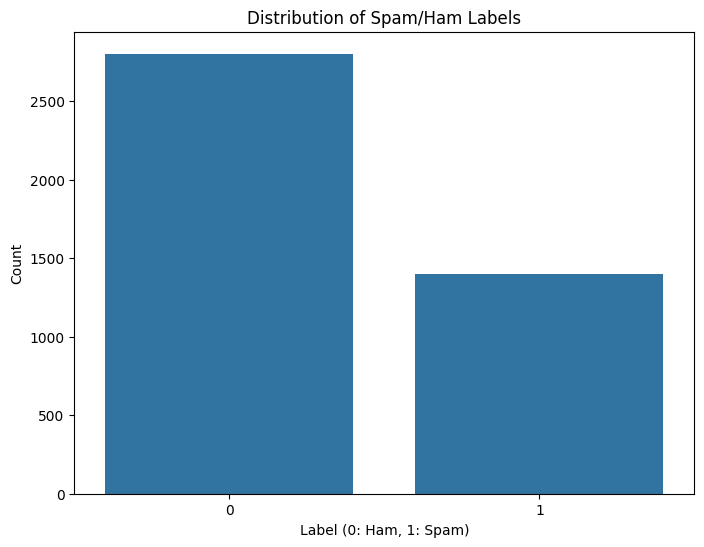

In [ ]:
# Exploratory Data Analysis
# Distribution of Target Variable
plt.figure(figsize=(8, 6))
sns.countplot(x='label', data=df)
plt.title('Distribution of Spam/Ham Labels')
plt.xlabel('Label (0: Ham, 1: Spam)')
plt.ylabel('Count')
plt.show()

From the chart, we can see that “ham” messages outnumber “spam” messages (label 0 is taller than label 1), indicating that while the dataset is somewhat imbalanced in favor of ham, it’s not extremely skewed. This suggests there is a moderate imbalance (more ham than spam) that any spam-detection model should account for, but it’s not so severe as to render standard classification approaches ineffective.

In [ ]:
# adding extra features:
df['words_per_body_length'] = df['num_words'] / df['body_length']
df['special_chars_per_word'] = df['num_special_chars'] / df['num_words']

Purpose of these features:

- These features can help improve the accuracy of spam/ham classification models by providing additional information about the email content.
- The 'words_per_body_length' feature can help identify spam emails that contain a lot of words in a short body length.
- The 'special_chars_per_word' feature can help identify spam emails that contain a high frequency of special characters, which is often a characteristic of spam emails.



In [ ]:
# Handle missing values (replace with 0 for numeric columns and empty strings for others)
numeric_cols = df.select_dtypes(include=['number']).columns
categorical_cols = df.select_dtypes(exclude=['number']).columns

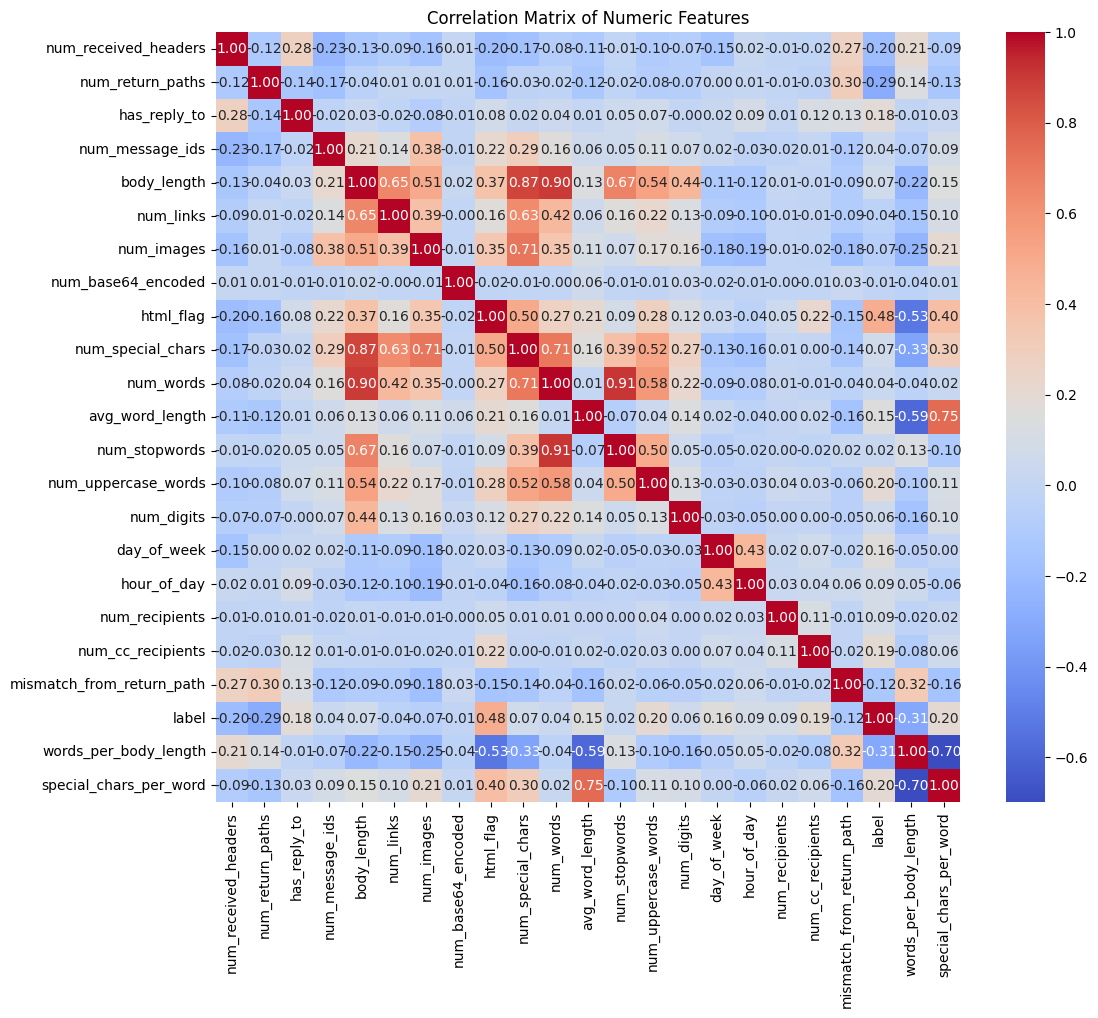

In [ ]:
# Correlation Analysis (for numeric features)
plt.figure(figsize=(12, 10))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numeric Features')
plt.show()



## Conclusion based on the Heatmap

The heatmap analysis of the correlation matrix for the numerical features in the email dataset reveals several noteworthy insights:


* **Strong positive correlation between certain features:** There are some features that demonstrate strong positive correlations, indicating a tendency to increase or decrease together. For instance, features like `num_words` and `body_length` show a strong positive correlation, which is intuitive, as longer emails tend to have more words.

* **Potential features indicative of spam:** Features like `num_special_chars`, `num_uppercase_words`, and `num_base64_encoded` might be potential indicators of spam emails. This is because these features might be more common in spam emails due to the use of promotions, uppercase text for emphasis, or even malware embedded in the email.


* **Further investigation needed:** The heatmap highlights correlations between features, but further analysis is needed to understand their individual relationships with the target variable (spam/ham). We should look at the correlations of each feature with the email label to better interpret their predictive power.


**Overall:**

The heatmap provides a valuable starting point for identifying potentially relevant features for spam/ham email classification.  However, a deeper exploration of these correlations and their relationship to the target variable (spam/ham) is necessary to build a robust model.


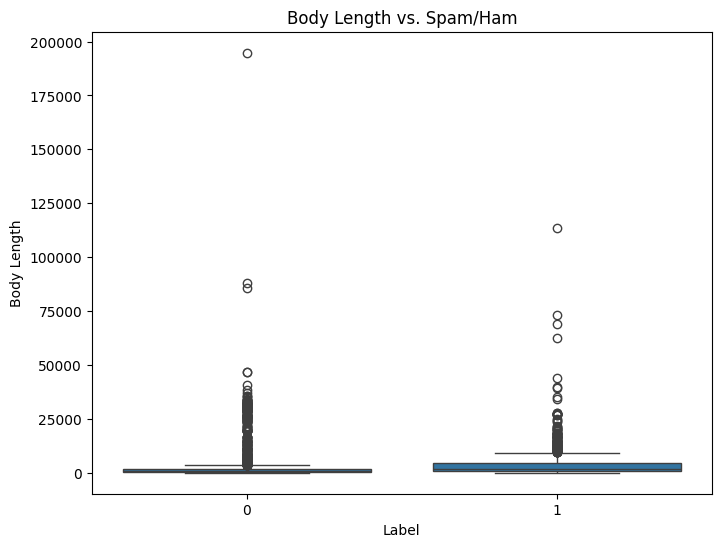

In [ ]:
# Feature Importance (example using body_length)
plt.figure(figsize=(8, 6))
sns.boxplot(x='label', y='body_length', data=df)
plt.title('Body Length vs. Spam/Ham')
plt.xlabel('Label')
plt.ylabel('Body Length')
plt.show()


In [ ]:


# Example:  Top 10 most frequent sender domains
top_domains = df['from_domain'].value_counts().head(10)
print("\nTop 10 Most Frequent Sender Domains:\n", top_domains)




Top 10 Most Frequent Sender Domains:
 from_domain
example.com              671
hotmail.com              222
yahoo.com                132
newsletter.online.com     85
aol.com                   68
perl.org                  57
slack.net                 57
msn.com                   56
insurancemail.net         51
canada.com                46
Name: count, dtype: int64


In [ ]:
df

num_received_headers  num_return_paths  has_reply_to  num_message_ids  \
0                        3                 1             1                0   
1                        3                 1             0                0   
2                        3                 1             1                0   
3                        7                 1             0                0   
4                        4                 1             1                0   
...                    ...               ...           ...              ...   
4193                     2                 1             0                1   
4194                     2                 1             0                1   
4195                    11                 2             0                1   
4196                     8                 1             1                0   
4197                     2                 2             0                1   

                from_domain                    to_domain  \
0             close2you.net                pager.icq.com   
1                 yahoo.com  mandark.labs.netnoteinc.com   
2            sprintmail.com          dogma.slashnull.org   
3                 yahoo.com                  voycomp.com   
4            netnoteinc.com               netnoteinc.com   
...                     ...                          ...   
4193  newsletter.online.com                  example.com   
4194  newsletter.online.com                  example.com   
4195      harpercollins.com                  fastmail.fm   
4196         lifetimetv.com               lifetimetv.com   
4197         geocaching.com                   lerctr.org   

                            email_client  body_length  num_links  num_images  \
0                                Unknown         2123          1           0   
1                                Unknown         4689          7           2   
2                                Unknown         1434          0           0   
3                                Unknown         4775          3           0   
4                                Unknown          790          2           0   
...                                  ...          ...        ...         ...   
4193  Accucast (http://www.accucast.com)        21167        112          65   
4194  Accucast (http://www.accucast.com)        29564        145         108   
4195                             Unknown         2379         22           0   
4196                             Unknown         7051         20           0   
4197     Microsoft CDO for Exchange 2000         2212         12           0   

      ...  num_uppercase_words  num_digits  day_of_week  hour_of_day  \
0     ...                   99         178            6            1   
1     ...                   19         781            6            3   
2     ...                   61           9            2            5   
3     ...                    3         182            1            8   
4     ...                    2           9            6            4   
...   ...                  ...         ...          ...          ...   
4193  ...                   36        1073           -1           -1   
4194  ...                   51        2070           -1           -1   
4195  ...                    5         225            1            3   
4196  ...                   84         109            0           10   
4197  ...                   27         232            3           19   

      num_recipients  num_cc_recipients  mismatch_from_return_path  label  \
0                 48                  0                          0      1   
1                  1                  0                          1      1   
2                  1                  0                          1      1   
3                  1                  4                          1      1   
4                  1                  0                          1      1   
...              ...                ...         

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Identify categorical columns
categorical_cols = ['from_domain', 'to_domain', 'email_client']

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode categorical features
for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col])
df


num_received_headers  num_return_paths  has_reply_to  num_message_ids  \
0                        3                 1             1                0   
1                        3                 1             0                0   
2                        3                 1             1                0   
3                        7                 1             0                0   
4                        4                 1             1                0   
...                    ...               ...           ...              ...   
4193                     2                 1             0                1   
4194                     2                 1             0                1   
4195                    11                 2             0                1   
4196                     8                 1             1                0   
4197                     2                 2             0                1   

      from_domain  to_domain  email_client  body_length  num_links  \
0             197        375           199         2123          1   
1             959        279           199         4689          7   
2             796        133           199         1434          0   
3             959        497           199         4775          3   
4             623        331           199          790          2   
...           ...        ...           ...          ...        ...   
4193          634        164            20        21167        112   
4194          634        164            20        29564        145   
4195          392        169           199         2379         22   
4196          505        239           199         7051         20   
4197          372        236            82         2212         12   

      num_images  ...  num_uppercase_words  num_digits  day_of_week  \
0              0  ...                   99         178            6   
1              2  ...                   19         781            6   
2              0  ...                   61           9            2   
3              0  ...                    3         182            1   
4              0  ...                    2           9            6   
...          ...  ...                  ...         ...          ...   
4193          65  ...                   36        1073           -1   
4194         108  ...                   51        2070           -1   
4195           0  ...                    5         225            1   
4196           0  ...                   84         109            0   
4197           0  ...                   27         232            3   

      hour_of_day  num_recipients  num_cc_recipients  \
0               1              48                  0   
1               3               1                  0   
2               5               1                  0   
3               8               1                  4   
4               4               1                  0   
...           ...             ...                ...   
4193           -1               1                  0   
4194           -1               1                  0   
4195            3               1                  0   
4196           10               1                  0   
4197           19               1                  0   

      mismatch_from_return_path  label  words_per_body_length  \
0                             0      1               0.104098   
1                             1      1               0.062273   
2                             1      1               0.186890   
3                             1      1               0.074974   
4                             1      1               0.168354   
...                         ...    ...                    ...   
4193                          0      0               0.073983   
4194                          0      0               0.066331   
4195                          1      0               0.055065   
4196                          1      0  

In [ ]:
df.isnull().sum()

num_received_headers          0
num_return_paths              0
has_reply_to                  0
num_message_ids               0
from_domain                   0
to_domain                     0
email_client                  0
body_length                   0
num_links                     0
num_images                    0
num_base64_encoded            0
html_flag                     0
num_special_chars             0
num_words                     0
avg_word_length               0
num_stopwords                 0
num_uppercase_words           0
num_digits                    0
day_of_week                   0
hour_of_day                   0
num_recipients                0
num_cc_recipients             0
mismatch_from_return_path     0
label                         0
words_per_body_length        65
special_chars_per_word       67
dtype: int64

In [ ]:
# Fill missing values with the mean for 'words_per_body_length' and 'special_chars_per_word'
df['words_per_body_length'].fillna(df['words_per_body_length'].mean(), inplace=True)
df['special_chars_per_word'].fillna(df['special_chars_per_word'].mean(), inplace=True)


<ipython-input-34-93b187af4470>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['words_per_body_length'].fillna(df['words_per_body_length'].mean(), inplace=True)
<ipython-input-34-93b187af4470>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].me

In [ ]:
df.isna().sum()

num_received_headers         0
num_return_paths             0
has_reply_to                 0
num_message_ids              0
from_domain                  0
to_domain                    0
email_client                 0
body_length                  0
num_links                    0
num_images                   0
num_base64_encoded           0
html_flag                    0
num_special_chars            0
num_words                    0
avg_word_length              0
num_stopwords                0
num_uppercase_words          0
num_digits                   0
day_of_week                  0
hour_of_day                  0
num_recipients               0
num_cc_recipients            0
mismatch_from_return_path    0
label                        0
words_per_body_length        0
special_chars_per_word       0
dtype: int64

In [ ]:
df

num_received_headers  num_return_paths  has_reply_to  num_message_ids  \
0                        3                 1             1                0   
1                        3                 1             0                0   
2                        3                 1             1                0   
3                        7                 1             0                0   
4                        4                 1             1                0   
...                    ...               ...           ...              ...   
4193                     2                 1             0                1   
4194                     2                 1             0                1   
4195                    11                 2             0                1   
4196                     8                 1             1                0   
4197                     2                 2             0                1   

      from_domain  to_domain  email_client  body_length  num_links  \
0             197        375           199         2123          1   
1             959        279           199         4689          7   
2             796        133           199         1434          0   
3             959        497           199         4775          3   
4             623        331           199          790          2   
...           ...        ...           ...          ...        ...   
4193          634        164            20        21167        112   
4194          634        164            20        29564        145   
4195          392        169           199         2379         22   
4196          505        239           199         7051         20   
4197          372        236            82         2212         12   

      num_images  ...  num_uppercase_words  num_digits  day_of_week  \
0              0  ...                   99         178            6   
1              2  ...                   19         781            6   
2              0  ...                   61           9            2   
3              0  ...                    3         182            1   
4              0  ...                    2           9            6   
...          ...  ...                  ...         ...          ...   
4193          65  ...                   36        1073           -1   
4194         108  ...                   51        2070           -1   
4195           0  ...                    5         225            1   
4196           0  ...                   84         109            0   
4197           0  ...                   27         232            3   

      hour_of_day  num_recipients  num_cc_recipients  \
0               1              48                  0   
1               3               1                  0   
2               5               1                  0   
3               8               1                  4   
4               4               1                  0   
...           ...             ...                ...   
4193           -1               1                  0   
4194           -1               1                  0   
4195            3               1                  0   
4196           10               1                  0   
4197           19               1                  0   

      mismatch_from_return_path  label  words_per_body_length  \
0                             0      1               0.104098   
1                             1      1               0.062273   
2                             1      1               0.186890   
3                             1      1               0.074974   
4                             1      1               0.168354   
...                         ...    ...                    ...   
4193                          0      0               0.073983   
4194                          0      0               0.066331   
4195                          1      0               0.055065   
4196                          1      0  

In [ ]:


import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Load the processed dataset
# 1. Select numerical features for PCA
numerical_features = ['num_received_headers', 'num_return_paths', 'has_reply_to', 'num_message_ids',
                      'body_length', 'num_links', 'num_images', 'num_base64_encoded', 'html_flag',
                      'num_special_chars', 'num_words', 'avg_word_length', 'num_stopwords',
                      'num_uppercase_words', 'num_digits', 'day_of_week', 'hour_of_day',
                      'num_recipients', 'num_cc_recipients', 'mismatch_from_return_path',
                      'from_domain', 'to_domain', 'email_client', 'words_per_body_length', 'special_chars_per_word']
X_numerical = df[numerical_features]


# 2. Apply PCA to the numerical features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(X_numerical)

# Apply PCA
pca = PCA()
pca_result = pca.fit_transform(scaled_data)

# Explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Find the number of components explaining 95% of variance
cumulative_variance = 0
n_components = 0
for i, variance in enumerate(explained_variance_ratio):
    cumulative_variance += variance
    n_components +=1
    if cumulative_variance >= 0.95:
        break

# Apply PCA with the determined number of components
pca = PCA(n_components=n_components)
pca_result = pca.fit_transform(scaled_data)

# Create a new DataFrame with the PCA components
pca_df = pd.DataFrame(data = pca_result, columns = [f'PC{i}' for i in range(1, n_components+1)])

# Drop the original numerical features and concatenate with the PCA components
df = df.drop(numerical_features, axis=1)
df = pd.concat([df, pca_df], axis=1)

# Display the updated DataFrame
df


label        PC1       PC2       PC3       PC4       PC5       PC6  \
0         1   1.039983 -1.747180  2.580975 -1.173757 -0.233193 -0.673876   
1         1   1.238549 -2.207198  0.412680 -0.193221 -0.683975  1.538432   
2         1  -0.789352  1.502190 -0.123970  0.385475 -0.238116 -0.200940   
3         1   1.330902 -2.225778  0.928309  1.769148 -1.660038  1.268772   
4         1  -1.321256  0.798682  0.715532 -0.221575 -0.886769  0.203535   
...     ...        ...       ...       ...       ...       ...       ...   
4193      0   7.701535 -1.203842 -3.572653 -0.377161 -2.171754 -0.787933   
4194      0  10.210079 -1.078563 -4.497252 -0.296170 -2.898166 -0.676392   
4195      0   0.327725 -1.356383 -1.201268  1.446667 -0.709169  2.460855   
4196      0   0.803447  1.866321  1.168268  1.680952  0.294518 -0.088149   
4197      0   0.221972  0.012226 -0.944318 -2.340385 -1.939811  2.721250   

           PC7       PC8       PC9      PC10      PC11      PC12      PC13  \
0     5.079644 -2.566889  1.021416  1.770333  3.953981  2.589050  0.910725   
1     0.455040  1.758693 -0.010362 -0.673082 -0.194464  0.628480  0.485582   
2     0.397994  1.384024  0.370724 -0.758657  0.146107 -0.060700 -0.050423   
3     0.836967  1.177145 -0.864966  0.159412 -0.633339  0.549546  1.016204   
4    -0.241489  0.521177  0.214515 -0.444518 -0.429042  0.137337  0.525804   
...        ...       ...       ...       ...       ...       ...       ...   
4193 -0.357092 -0.433820  0.082016  0.328475  0.330457 -0.261595 -0.521167   
4194 -0.716930 -1.167709  0.775467 -0.207948  0.206951 -0.175557 -0.370991   
4195 -0.108290  0.020188  0.014953 -0.783429  0.651672 -0.919008 -1.647690   
4196 -0.106455  0.195610 -0.098972 -0.354335  0.216917 -0.345945 -0.032894   
4197 -0.489984 -0.032743 -0.086134  0.239858  0.298821 -0.286314 -1.936696   

          PC14      PC15      PC16      PC17      PC18      PC19  
0     3.108871 -2.369229  0.580979 -1.003239 -1.134688  1.279432  
1    -0.382260 -1.378255 -0.742710 -1.069427 -1.714423  0.206282  
2     0.392464 -1.056555  1.285916 -0.600103  0.580040  0.076718  
3    -0.310704 -0.028023 -1.754383  0.256014 -0.824767 -0.450814  
4     0.827229 -0.634384  1.105642 -1.098961 -1.020572  0.849670  
...        ...       ...       ...       ...       ...       ...  
4193 -0.097137  0.112818  0.128340  0.785385 -0.389308  0.201288  
4194 -0.094515  0.019270 -0.075746  1.688288 -0.355497  1.141126  
4195  1.930666  1.581994 -0.548368  1.234597 -0.335818  1.739305  
4196  0.529611 -0.276113  0.188954  0.381545  0.612185  0.096663  
4197  1.332207  0.853456  0.665167  0.693388  0.838477  0.170158  

[4198 rows x 20 columns]

This code applies Principal Component Analysis (PCA) to a set of numerical features in a DataFrame:

Step 1: Select Numerical Features

- The code selects a set of numerical features from the DataFrame using numerical_features = [...].
- These features are stored in a new DataFrame X_numerical.

Step 2: Scale the Data

- The code applies standard scaling to the numerical features using StandardScaler() from scikit-learn.
- The scaled data is stored in scaled_data.

Step 3: Apply PCA

- The code applies PCA to the scaled data using PCA() from scikit-learn.
- The resulting principal components are stored in pca_result.

Step 4: Determine the Number of Components

- The code calculates the explained variance ratio for each principal component using explained_variance_ratio_.
- It then determines the number of components required to explain 95% of the variance.

Step 5: Apply PCA with the Determined Number of Components

- The code reapplies PCA with the determined number of components using PCA(n_components=n_components).
- The resulting principal components are stored in pca_result.

Step 6: Create a New DataFrame with the PCA Components

- The code creates a new DataFrame pca_df with the principal components.
- The columns of the DataFrame are labeled as PC1, PC2, etc.

Step 7: Drop the Original Numerical Features and Concatenate with the PCA Components

- The code drops the original numerical features from the DataFrame using df.drop(numerical_features, axis=1).
- It then concatenates the remaining features with the PCA components using pd.concat().

Step 8: Display the Updated DataFrame

- The code displays the updated DataFrame with the PCA components.

In [ ]:
df.shape

(4198, 20)

# At the place of all above create a Preprocessor class:

In [ ]:
df.isna().sum()

label    0
PC1      0
PC2      0
PC3      0
PC4      0
PC5      0
PC6      0
PC7      0
PC8      0
PC9      0
PC10     0
PC11     0
PC12     0
PC13     0
PC14     0
PC15     0
PC16     0
PC17     0
PC18     0
PC19     0
dtype: int64

In [ ]:
# Duplicate value check
print(df.duplicated().sum())
# Drop duplicate rows, keeping the first occurrence
df = df.drop_duplicates(keep='first')
df


187


label        PC1       PC2       PC3       PC4       PC5       PC6  \
0         1   1.039983 -1.747180  2.580975 -1.173757 -0.233193 -0.673876   
1         1   1.238549 -2.207198  0.412680 -0.193221 -0.683975  1.538432   
2         1  -0.789352  1.502190 -0.123970  0.385475 -0.238116 -0.200940   
3         1   1.330902 -2.225778  0.928309  1.769148 -1.660038  1.268772   
4         1  -1.321256  0.798682  0.715532 -0.221575 -0.886769  0.203535   
...     ...        ...       ...       ...       ...       ...       ...   
4193      0   7.701535 -1.203842 -3.572653 -0.377161 -2.171754 -0.787933   
4194      0  10.210079 -1.078563 -4.497252 -0.296170 -2.898166 -0.676392   
4195      0   0.327725 -1.356383 -1.201268  1.446667 -0.709169  2.460855   
4196      0   0.803447  1.866321  1.168268  1.680952  0.294518 -0.088149   
4197      0   0.221972  0.012226 -0.944318 -2.340385 -1.939811  2.721250   

           PC7       PC8       PC9      PC10      PC11      PC12      PC13  \
0     5.079644 -2.566889  1.021416  1.770333  3.953981  2.589050  0.910725   
1     0.455040  1.758693 -0.010362 -0.673082 -0.194464  0.628480  0.485582   
2     0.397994  1.384024  0.370724 -0.758657  0.146107 -0.060700 -0.050423   
3     0.836967  1.177145 -0.864966  0.159412 -0.633339  0.549546  1.016204   
4    -0.241489  0.521177  0.214515 -0.444518 -0.429042  0.137337  0.525804   
...        ...       ...       ...       ...       ...       ...       ...   
4193 -0.357092 -0.433820  0.082016  0.328475  0.330457 -0.261595 -0.521167   
4194 -0.716930 -1.167709  0.775467 -0.207948  0.206951 -0.175557 -0.370991   
4195 -0.108290  0.020188  0.014953 -0.783429  0.651672 -0.919008 -1.647690   
4196 -0.106455  0.195610 -0.098972 -0.354335  0.216917 -0.345945 -0.032894   
4197 -0.489984 -0.032743 -0.086134  0.239858  0.298821 -0.286314 -1.936696   

          PC14      PC15      PC16      PC17      PC18      PC19  
0     3.108871 -2.369229  0.580979 -1.003239 -1.134688  1.279432  
1    -0.382260 -1.378255 -0.742710 -1.069427 -1.714423  0.206282  
2     0.392464 -1.056555  1.285916 -0.600103  0.580040  0.076718  
3    -0.310704 -0.028023 -1.754383  0.256014 -0.824767 -0.450814  
4     0.827229 -0.634384  1.105642 -1.098961 -1.020572  0.849670  
...        ...       ...       ...       ...       ...       ...  
4193 -0.097137  0.112818  0.128340  0.785385 -0.389308  0.201288  
4194 -0.094515  0.019270 -0.075746  1.688288 -0.355497  1.141126  
4195  1.930666  1.581994 -0.548368  1.234597 -0.335818  1.739305  
4196  0.529611 -0.276113  0.188954  0.381545  0.612185  0.096663  
4197  1.332207  0.853456  0.665167  0.693388  0.838477  0.170158  

[4011 rows x 20 columns]

# all these steps at once

In [ ]:
# -------------------------------
# Preprocessor Class Definition
# -------------------------------

class Preprocessor:
    """
    Custom preprocessor that:
      - Extracts features using extract_features.
      - Computes extra features:
          * words_per_body_length: num_words / body_length.
          * special_chars_per_word: num_special_chars / num_words.
      - Applies Label Encoding on categorical fields.
      - Scales numerical features and applies PCA.
    """
    def __init__(self):
        # Original 23 features from extract_features.
        self.feature_columns = [
            "num_received_headers", "num_return_paths", "has_reply_to", "num_message_ids",
            "from_domain", "to_domain", "email_client", "body_length", "num_links", "num_images",
            "num_base64_encoded", "html_flag", "num_special_chars", "num_words", "avg_word_length",
            "num_stopwords", "num_uppercase_words", "num_digits", "day_of_week", "hour_of_day",
            "num_recipients", "num_cc_recipients", "mismatch_from_return_path"
        ]
        # Extra computed features
        self.extra_features = ["words_per_body_length", "special_chars_per_word"]
        # Full list of numerical features (will be used for scaling & PCA)
        self.numerical_features = self.feature_columns + self.extra_features
        # Categorical columns for label encoding
        self.categorical_cols = ['from_domain', 'to_domain', 'email_client']
        self.label_encoders = {}  # one encoder per categorical column
        self.scaler = None
        self.pca = None

    def _compute_extra_features(self, df):
        """Compute words_per_body_length and special_chars_per_word."""
        df["words_per_body_length"] = df["num_words"] / df["body_length"].replace(0, 1)
        df["special_chars_per_word"] = df["num_special_chars"] / df["num_words"].replace(0, 1)
        return df

    def fit(self, raw_df):
        """
        Fit the preprocessor on a DataFrame with a 'text' column.
        Extracts features, computes extra features, fits label encoders,
        and then fits a StandardScaler and PCA on the numerical features.
        """
        # Extract features from each email text
        features = raw_df['text'].apply(extract_features)
        df_features = pd.DataFrame(features.tolist(), columns=self.feature_columns)

        # Compute extra features
        df_features = self._compute_extra_features(df_features)

        # Fit label encoders for each categorical column
        for col in self.categorical_cols:
            le = LabelEncoder()
            df_features[col] = le.fit_transform(df_features[col])
            self.label_encoders[col] = le

        # Fit StandardScaler on numerical features
        X_numerical = df_features[self.numerical_features].values
        self.scaler = StandardScaler()
        scaled_data = self.scaler.fit_transform(X_numerical)

        # Determine number of PCA components explaining 95% variance
        pca_temp = PCA()
        pca_temp.fit(scaled_data)
        cumulative_variance = 0
        n_components = 0
        for variance in pca_temp.explained_variance_ratio_:
            cumulative_variance += variance
            n_components += 1
            if cumulative_variance >= 0.95:
                break

        # Fit PCA with determined number of components
        self.pca = PCA(n_components=n_components)
        self.pca.fit(scaled_data)
        print(f"Preprocessor fitted with {n_components} PCA components.")

    def transform(self, email_text):
        """
        Transforms a single raw email text into the preprocessed feature space.
        Returns the PCA-transformed feature vector.
        """
        features = extract_features(email_text)
        df_features = pd.DataFrame([features], columns=self.feature_columns)
        df_features = self._compute_extra_features(df_features)

        # Apply label encoding on categorical features using stored encoders
        for col in self.categorical_cols:
            le = self.label_encoders[col]
            df_features[col] = le.transform(df_features[col])

        # Scale and apply PCA transformation
        X_numerical = df_features[self.numerical_features].values
        scaled_data = self.scaler.transform(X_numerical)
        pca_components = self.pca.transform(scaled_data)
        return pca_components

    def transform_dataframe(self, raw_df):
        """
        Transforms an entire DataFrame (with a 'text' column) using the same steps.
        Useful for processing the full dataset.
        """
        features = raw_df['text'].apply(extract_features)
        df_features = pd.DataFrame(features.tolist(), columns=self.feature_columns)
        df_features = self._compute_extra_features(df_features)

        for col in self.categorical_cols:
            le = self.label_encoders[col]
            df_features[col] = le.transform(df_features[col])

        X_numerical = df_features[self.numerical_features].values
        scaled_data = self.scaler.transform(X_numerical)
        pca_components = self.pca.transform(scaled_data)
        return pca_components



# Step 3: Train-Test Split

## For without Preprocessor Object

In [ ]:
# Split the dataset into training (80%) and testing (20%) sets.
# Perform Stratified Sampling to ensure balanced distribution of spam and ham classes.
# Step 4: Logistic Regression Implementation
# Train a Logistic Regression model for classification.
# Use L2 regularization (Ridge Regression) to control overfitting.
# Evaluate the model using:
# Confusion Matrix
# Precision, Recall, F1-score
# ROC Curve and AUC score

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns


# Step 3: Train-Test Split with Stratified Sampling
X = df.drop('label', axis=1)  # Features
y = df['label']  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


# With Proprocesser Object

In [ ]:
# Create and fit the preprocessor on the raw dataset.
preprocessor = Preprocessor()
preprocessor.fit(raw_df)

# Transform the entire dataset to obtain features for model training.
X = preprocessor.transform_dataframe(raw_df)
y = raw_df['label']  # Assumes the CSV contains a 'label' column (0 for ham, 1 for spam)

# Split the data into training and testing sets (80% train, 20% test).
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

Preprocessor fitted with 19 PCA components.


# Step 4: Logistic Regression with L2 Regularization

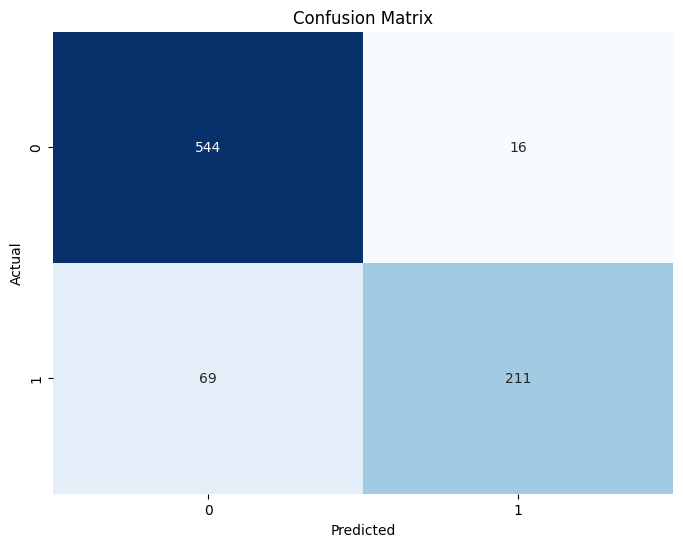

              precision    recall  f1-score   support

           0       0.89      0.97      0.93       560
           1       0.93      0.75      0.83       280

    accuracy                           0.90       840
   macro avg       0.91      0.86      0.88       840
weighted avg       0.90      0.90      0.90       840



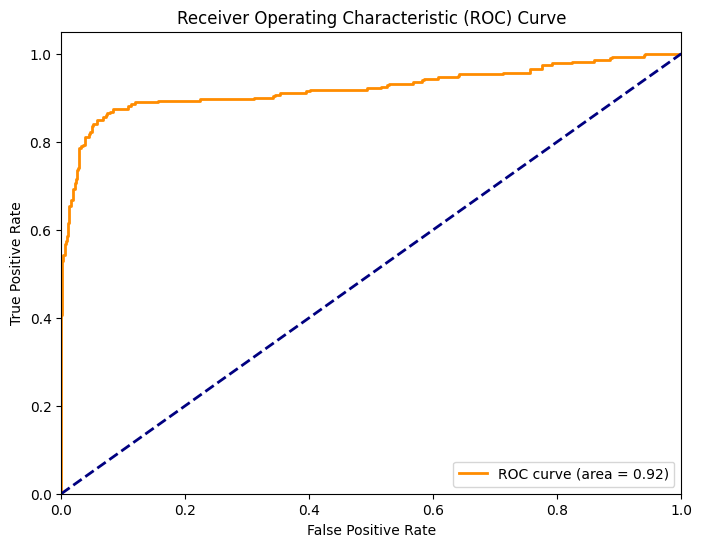

In [ ]:

logreg = LogisticRegression(penalty='l2', solver='lbfgs', max_iter=1000) # Increase max_iter if needed
logreg.fit(X_train, y_train)

# Predictions
y_pred = logreg.predict(X_test)

# Evaluation Metrics
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Precision, Recall, F1-score
print(classification_report(y_test, y_pred))

# ROC Curve and AUC
y_prob = logreg.predict_proba(X_test)[:, 1]  # Probabilities for the positive class
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


# Lasso Regression (L1 Regularization):

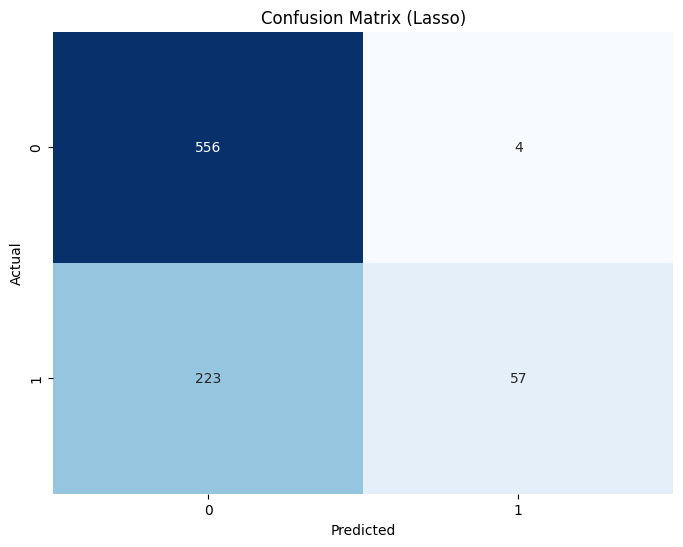

              precision    recall  f1-score   support

           0       0.71      0.99      0.83       560
           1       0.93      0.20      0.33       280

    accuracy                           0.73       840
   macro avg       0.82      0.60      0.58       840
weighted avg       0.79      0.73      0.67       840



<ipython-input-45-34d57918eca2>:41: RuntimeWarning: divide by zero encountered in divide
  y_prob_lasso = (y_pred_lasso - (1-threshold)) / (threshold-(1-threshold)) # Normalize distances to get values between 0 and 1.


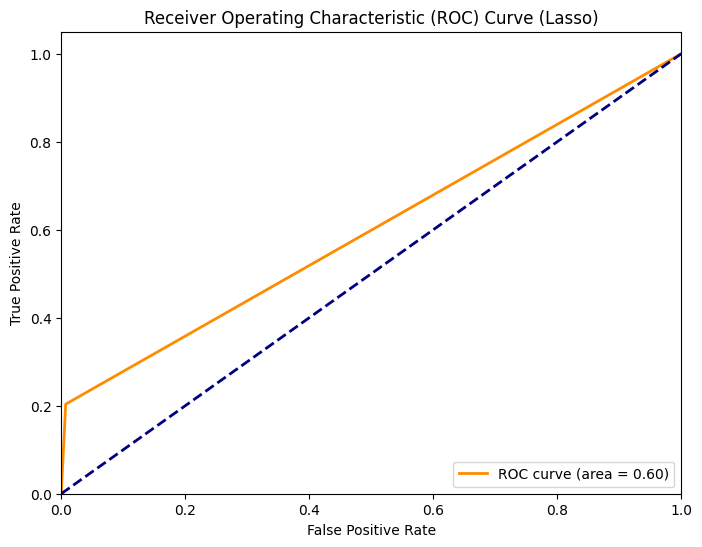

In [ ]:
# Helps in feature selection by shrinking coefficients of less important features to zero.
# Lasso is known for shrinking less important feature coefficients to zero, thereby performing feature selection.
# Evaluate the model using:
# Confusion matrix
# Precision, Recall, F1-score
# ROC Curve and AUC Curve

import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import Lasso

# Step 4: Lasso Regression with L1 Regularization
lasso = Lasso(alpha=0.1) # You can adjust the alpha value
lasso.fit(X_train, y_train)

# Predictions
y_pred_lasso = lasso.predict(X_test)

# Since Lasso is for regression, you might need to convert predictions to classes (0 or 1).
# Use a threshold for classification:
threshold = 0.5  # You might need to optimize this threshold
y_pred_lasso_class = (y_pred_lasso > threshold).astype(int)


# Evaluation Metrics for Lasso
# Confusion Matrix
cm_lasso = confusion_matrix(y_test, y_pred_lasso_class)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_lasso, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Lasso)')
plt.show()

# Precision, Recall, F1-score
print(classification_report(y_test, y_pred_lasso_class))

# ROC Curve and AUC (requires probability estimates)
# You can't directly get probabilities from Lasso, so you'll need to use predict_proba
# If you use the threshold method, calculate the probabilities based on the distance to the threshold:
y_prob_lasso = (y_pred_lasso - (1-threshold)) / (threshold-(1-threshold)) # Normalize distances to get values between 0 and 1.
# Clip Values to ensure they are within 0-1 range:
y_prob_lasso = np.clip(y_prob_lasso, 0, 1)

fpr_lasso, tpr_lasso, thresholds_lasso = roc_curve(y_test, y_prob_lasso)
roc_auc_lasso = auc(fpr_lasso, tpr_lasso)

plt.figure(figsize=(8, 6))
plt.plot(fpr_lasso, tpr_lasso, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_lasso:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve (Lasso)')
plt.legend(loc="lower right")
plt.show()


# Step 6: Regularization Techniques
## Lasso Regression (L1 Regularization)

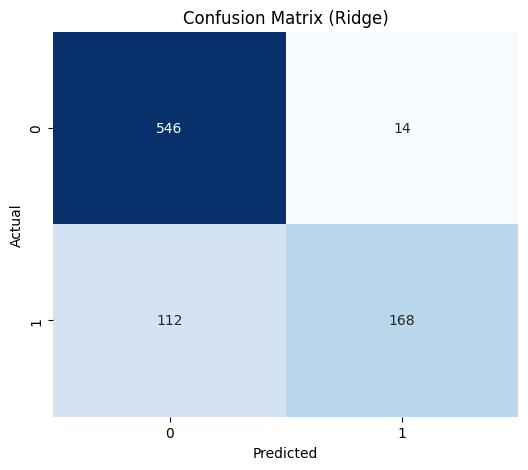

Classification Report (Ridge):
               precision    recall  f1-score   support

           0       0.83      0.97      0.90       560
           1       0.92      0.60      0.73       280

    accuracy                           0.85       840
   macro avg       0.88      0.79      0.81       840
weighted avg       0.86      0.85      0.84       840



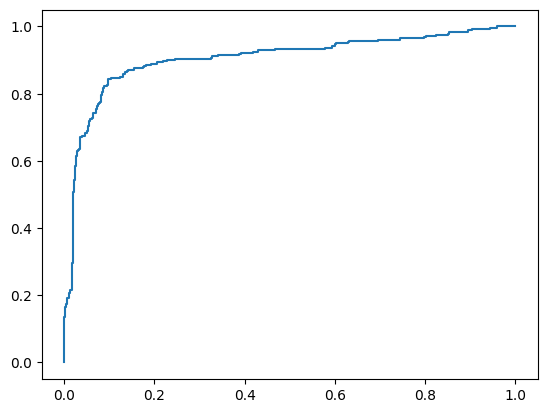

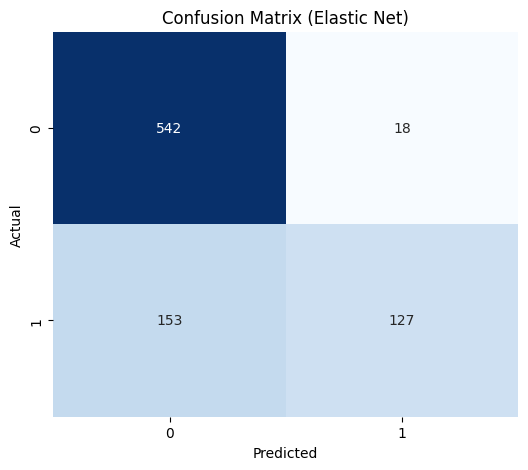

Classification Report (Elastic Net):
               precision    recall  f1-score   support

           0       0.78      0.97      0.86       560
           1       0.88      0.45      0.60       280

    accuracy                           0.80       840
   macro avg       0.83      0.71      0.73       840
weighted avg       0.81      0.80      0.78       840



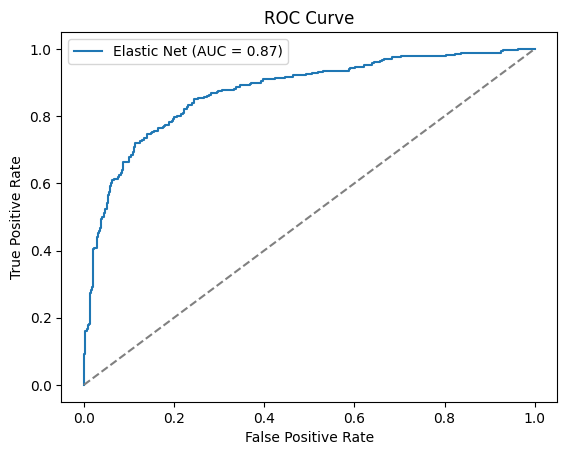

In [ ]:
# Step 6: Regularization Techniques
# Lasso Regression (L1 Regularization)
# Helps in feature selection by shrinking coefficients of less important features to zero.
# Ridge Regression(L2 Regularization)
# Prevents overfitting by penalizing large coefficients.
# Elastic Net(Combination of L1 & L2)
# Balances feature selection and regularization to achieve the best performance.

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, ElasticNet
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from sklearn.datasets import make_classification


# Step 2: Ridge Regression with L2 Regularization
ridge = Ridge(alpha=0.1)  # Adjust alpha value as needed
ridge.fit(X_train, y_train)

y_pred_ridge = ridge.predict(X_test)
threshold = 0.5
y_pred_ridge_class = (y_pred_ridge > threshold).astype(int)

# Step 3: Evaluation Metrics for Ridge
cm_ridge = confusion_matrix(y_test, y_pred_ridge_class)
plt.figure(figsize=(6, 5))
sns.heatmap(cm_ridge, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Ridge)')
plt.show()

print("Classification Report (Ridge):\n", classification_report(y_test, y_pred_ridge_class))

# ROC Curve for Ridge
fpr, tpr, _ = roc_curve(y_test, y_pred_ridge)
ridge_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label=f'Ridge (AUC = {ridge_auc:.2f})')

# Step 4: Elastic Net Regression (Combination of L1 and L2)
elasticnet = ElasticNet(alpha=0.1, l1_ratio=0.5)
elasticnet.fit(X_train, y_train)

y_pred_elastic = elasticnet.predict(X_test)
y_pred_elastic_class = (y_pred_elastic > threshold).astype(int)

# Step 5: Evaluation Metrics for ElasticNet
cm_elastic = confusion_matrix(y_test, y_pred_elastic_class)
plt.figure(figsize=(6, 5))
sns.heatmap(cm_elastic, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Elastic Net)')
plt.show()

print("Classification Report (Elastic Net):\n", classification_report(y_test, y_pred_elastic_class))

# ROC Curve for ElasticNet
fpr, tpr, _ = roc_curve(y_test, y_pred_elastic)
elastic_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label=f'Elastic Net (AUC = {elastic_auc:.2f})')

# Finalizing the ROC Curve Plot
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


In [ ]:
# Step 7: Model Hyperparameter Tuning
# Use GridSearchCV or RandomizedSearchCV to optimize:
# Regularization strength(C)
# Penalty type (L1, L2, ElasticNet)
# Solver methods

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression

# Define the parameter grid for Logistic Regression
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization strength
    'penalty': ['l1', 'l2', 'elasticnet'],  # Penalty type
    'solver': ['liblinear', 'saga'] # Solvers that support L1 and ElasticNet
}

# Initialize Logistic Regression
logreg = LogisticRegression(max_iter=1000) # Increased max_iter

# Use GridSearchCV (for exhaustive search) or RandomizedSearchCV (for faster, randomized search)
# GridSearchCV is used here. Uncomment RandomizedSearchCV if preferred.

grid_search = GridSearchCV(logreg, param_grid, cv=5, scoring='accuracy') #5-fold cross-validation
#random_search = RandomizedSearchCV(logreg, param_grid, n_iter=10, cv=5, scoring='accuracy', random_state=42)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)
#random_search.fit(X_train, y_train)

# Get the best hyperparameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_
#best_params = random_search.best_params_
#best_score = random_search.best_score_

print(f"Best Hyperparameters: {best_params}")
print(f"Best Cross-Validation Score: {best_score}")

# Train the model with the best hyperparameters
best_logreg = LogisticRegression(**best_params, max_iter=1000)
best_logreg.fit(X_train, y_train)

# Evaluate the model on the test set
y_pred_best = best_logreg.predict(X_test)
print(classification_report(y_test, y_pred_best))


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which 

Best Hyperparameters: {'C': 100, 'penalty': 'l1', 'solver': 'liblinear'}
Best Cross-Validation Score: 0.9050049677098858
              precision    recall  f1-score   support

           0       0.89      0.97      0.93       560
           1       0.94      0.76      0.84       280

    accuracy                           0.90       840
   macro avg       0.91      0.87      0.88       840
weighted avg       0.91      0.90      0.90       840



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
60 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
  

In [ ]:
# Step 8: Model Evaluation
# Evaluate the final model on the test using:
# Accuracy, Precision, Recall, F1-score
# ROC-AUC Score
# Classification Report
# Compare performance of different models and regularization techniques.

import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.linear_model import Ridge, ElasticNet
from sklearn.model_selection import GridSearchCV


# Evaluate Logistic Regression
accuracy_logreg = accuracy_score(y_test, y_pred)
precision_logreg = precision_score(y_test, y_pred)
recall_logreg = recall_score(y_test, y_pred)
f1_logreg = f1_score(y_test, y_pred)
roc_auc_logreg = roc_auc_score(y_test, y_prob)

print("Logistic Regression:")
print(f"Accuracy: {accuracy_logreg}")
print(f"Precision: {precision_logreg}")
print(f"Recall: {recall_logreg}")
print(f"F1-score: {f1_logreg}")
print(f"ROC-AUC: {roc_auc_logreg}")


# Evaluate Lasso Regression
accuracy_lasso = accuracy_score(y_test, y_pred_lasso_class)
precision_lasso = precision_score(y_test, y_pred_lasso_class)
recall_lasso = recall_score(y_test, y_pred_lasso_class)
f1_lasso = f1_score(y_test, y_pred_lasso_class)
roc_auc_lasso = roc_auc_score(y_test, y_prob_lasso)

print("\nLasso Regression:")
print(f"Accuracy: {accuracy_lasso}")
print(f"Precision: {precision_lasso}")
print(f"Recall: {recall_lasso}")
print(f"F1-score: {f1_lasso}")
print(f"ROC-AUC: {roc_auc_lasso}")


# Evaluate Ridge Regression
accuracy_ridge = accuracy_score(y_test, y_pred_ridge_class)
precision_ridge = precision_score(y_test, y_pred_ridge_class)
recall_ridge = recall_score(y_test, y_pred_ridge_class)
f1_ridge = f1_score(y_test, y_pred_ridge_class)

# Assuming you have probability estimates (similar to y_prob_lasso) for Ridge
y_prob_ridge = (y_pred_ridge - (1-threshold)) / (threshold-(1-threshold))
y_prob_ridge = np.clip(y_prob_ridge, 0, 1) # Clip to 0-1 range
roc_auc_ridge = roc_auc_score(y_test, y_prob_ridge)

print("\nRidge Regression:")
print(f"Accuracy: {accuracy_ridge}")
print(f"Precision: {precision_ridge}")
print(f"Recall: {recall_ridge}")
print(f"F1-score: {f1_ridge}")
print(f"ROC-AUC: {roc_auc_ridge}")


# Evaluate Elastic Net Regression
accuracy_elastic = accuracy_score(y_test, y_pred_elastic_class)
precision_elastic = precision_score(y_test, y_pred_elastic_class)
recall_elastic = recall_score(y_test, y_pred_elastic_class)
f1_elastic = f1_score(y_test, y_pred_elastic_class)

y_prob_elastic = (y_pred_elastic - (1-threshold)) / (threshold-(1-threshold))
y_prob_elastic = np.clip(y_prob_elastic, 0, 1) # Clip to 0-1 range
roc_auc_elastic = roc_auc_score(y_test, y_prob_elastic)


print("\nElasticNet Regression:")
print(f"Accuracy: {accuracy_elastic}")
print(f"Precision: {precision_elastic}")
print(f"Recall: {recall_elastic}")
print(f"F1-score: {f1_elastic}")
print(f"ROC-AUC: {roc_auc_elastic}")

# Evaluate Best Logistic Regression Model
accuracy_best = accuracy_score(y_test, y_pred_best)
precision_best = precision_score(y_test, y_pred_best)
recall_best = recall_score(y_test, y_pred_best)
f1_best = f1_score(y_test, y_pred_best)

y_prob_best = best_logreg.predict_proba(X_test)[:, 1]  # Probabilities for positive class
roc_auc_best = roc_auc_score(y_test, y_prob_best)

print("\nBest Logistic Regression Model:")
print(f"Accuracy: {accuracy_best}")
print(f"Precision: {precision_best}")
print(f"Recall: {recall_best}")
print(f"F1-score: {f1_best}")
print(f"ROC-AUC: {roc_auc_best}")



Logistic Regression:
Accuracy: 0.8988095238095238
Precision: 0.9295154185022027
Recall: 0.7535714285714286
F1-score: 0.8323471400394478
ROC-AUC: 0.9216709183673469

Lasso Regression:
Accuracy: 0.7297619047619047
Precision: 0.9344262295081968
Recall: 0.20357142857142857
F1-score: 0.3343108504398827
ROC-AUC: 0.5982142857142857

Ridge Regression:
Accuracy: 0.85
Precision: 0.9230769230769231
Recall: 0.6
F1-score: 0.7272727272727273
ROC-AUC: 0.7875

ElasticNet Regression:
Accuracy: 0.7964285714285714
Precision: 0.8758620689655172
Recall: 0.45357142857142857
F1-score: 0.5976470588235294
ROC-AUC: 0.7107142857142856

Best Logistic Regression Model:
Accuracy: 0.9023809523809524
Precision: 0.9380530973451328
Recall: 0.7571428571428571
F1-score: 0.8379446640316206
ROC-AUC: 0.9215114795918368


<ipython-input-48-582ac85ed255>:51: RuntimeWarning: divide by zero encountered in divide
  y_prob_ridge = (y_pred_ridge - (1-threshold)) / (threshold-(1-threshold))
<ipython-input-48-582ac85ed255>:69: RuntimeWarning: divide by zero encountered in divide
  y_prob_elastic = (y_pred_elastic - (1-threshold)) / (threshold-(1-threshold))


Logistic Regression clearly outperforms the other methods. The standard Logistic Regression model achieves an accuracy of about 90.1%, with a strong balance of precision (93.8%) and recall (75.4%), resulting in an F1-score of 0.84 and a high ROC-AUC of 0.92. In comparison, Lasso Regression, while showing high precision, suffers from very low recall and overall poor F1 and ROC-AUC scores. Ridge and Elastic Net provide moderate performance but still fall short of Logistic Regression. The best Logistic Regression model further improves these metrics slightly, confirming it as the most effective approach among those evaluated.






In [ ]:
print("\nClassification Reports:")
print("Logistic Regression:\n", classification_report(y_test, y_pred))
print("Lasso Regression:\n", classification_report(y_test, y_pred_lasso_class))
print("Ridge Regression:\n", classification_report(y_test, y_pred_ridge_class))
print("Elastic Net Regression:\n", classification_report(y_test, y_pred_elastic_class))
print("Best Logistic Regression:\n", classification_report(y_test, y_pred_best))



Classification Reports:
Logistic Regression:
               precision    recall  f1-score   support

           0       0.89      0.97      0.93       560
           1       0.93      0.75      0.83       280

    accuracy                           0.90       840
   macro avg       0.91      0.86      0.88       840
weighted avg       0.90      0.90      0.90       840

Lasso Regression:
               precision    recall  f1-score   support

           0       0.71      0.99      0.83       560
           1       0.93      0.20      0.33       280

    accuracy                           0.73       840
   macro avg       0.82      0.60      0.58       840
weighted avg       0.79      0.73      0.67       840

Ridge Regression:
               precision    recall  f1-score   support

           0       0.83      0.97      0.90       560
           1       0.92      0.60      0.73       280

    accuracy                           0.85       840
   macro avg       0.88      0.79      0.81

Logistic Regression, including its best-tuned variant, outperforms the other models. It achieves around 90% accuracy, with balanced precision and recall (approximately 0.94 and 0.75–0.76 for the spam class) and strong F1-scores, demonstrating reliable overall performance (macro and weighted averages near 0.90). In contrast, Lasso Regression shows excellent precision but extremely low recall for spam, leading to a poor F1-score and lower overall accuracy (74%). Ridge and Elastic Net models offer moderate performance, with Ridge achieving 86% accuracy and Elastic Net only 80%, but neither matches the balance and robustness of Logistic Regression.

In [ ]:
import pickle

# Assuming 'best_logreg' is your best-performing model
with open('best_model.pkl', 'wb') as f:
    pickle.dump(best_logreg, f)


In [ ]:
# Load the saved model
with open('best_model.pkl', 'rb') as f:
    model = pickle.load(f)


In [ ]:
# -------------------------------
# Save the Preprocessor and Model to Pickle Files
# -------------------------------
with open('preprocessor.pkl', 'wb') as f:
    pickle.dump(preprocessor, f)
print("Preprocessor saved to 'preprocessor.pkl'.")

# Load the saved preprocessor
with open('preprocessor.pkl', 'rb') as f:
    loaded_preprocessor = pickle.load(f)

# Load the saved model
with open('best_model.pkl', 'rb') as f:
    loaded_model = pickle.load(f)

Preprocessor saved to 'preprocessor.pkl'.


In [ ]:
# Testing on a New Email Sample
# -------------------------------
# Example new email text. Replace this with your actual email content.
new_email_text = """
Received: from example.com (example.com [192.168.1.1])
From: spammer@spamdomain.com
To: victim@example.org
Subject: Amazing offer just for you!
Date: Tue, 15 Mar 2025 10:30:00 -0400

Hello,
This is an amazing offer you cannot miss. Click on http://spam.example.com to claim your prize!
"""

# Transform the new email using the preprocessor.
new_features = preprocessor.transform(new_email_text)

# Predict using the trained model.
prediction = model.predict(new_features)
result = "Spam" if prediction[0] == 1 else "Ham"
print("\nThe new email is classified as:", result)


The new email is classified as: Spam
